In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Computational Phyiscs: Project 1<h1>


**<h5> III. LINEAR OSCILLATORS VIA NUMERICAL INTEGRATION <h5>**

**Question #1**

This question has been described in detail on the complementary PDF.

**Question #2**

$\omega_o^2 = \frac{k}{m}$, 
$\beta = \frac{b}{2m}$,
$f_o = \frac{F(t)}{m}$


**Question #3 : Compute x(t) by using Trapezoid rule to evaluate the integral in equation (3).**


In [2]:
m = 1  #initalizing the mass value
steps = 1500 #initializing the number of time steps
x_final = 50 #initializing the final position 'x' that our function will go to 
x = np.linspace(0, x_final, steps) #time values for analytical soluton

omega_0 = 1 #initializing the first omega_o value that this code will use
f_0 = 10 #N/kg (This is my initial driving force)

##we have assumed that the oscillator is at rest at equilibrium.

def convolution(t_prime,alpha,beta,t):  
    omega_1 = (omega_0**2 - beta**2)**(1/2)
    f = (f_0*np.exp(-beta*t)/omega_1) * np.exp(t_prime*(beta - alpha))*np.sin(omega_1*(t - t_prime))
    return f 
#The 'convolution' function is my function that defines the integrand of this integral. This function will use three inputs to calculate the 
# convoultion of greens function. We will return the variable f which is an array

def trap(f,x): 
    integral = 0
    for i in range(len(f) - 1):
        integral += 0.5 * (f[i] + f[i+1]) * (x[i+1] - x[i])
    return integral

#The 'trap' function is my function that does trapezoid rule and returns a number as the variable 'integral'.
# This function accepts two inputs, both are arrays. One is the array of the funciton outputs that we are trying to integrate over, and the other is our x_axis array. 
 

**Justify your time step size choice by compoaring $\Delta{t}$ to a physical time sacle in the probem:**

We need to make our $\Delta{t}$ significantly smaller than the damping constant $\beta$. This must be the case, so that we can get a clear picture of the oscillators response to the force. Without our resolution scaled to a physical parameter the oscillator would damp away the position information between time steps.

**Question #4**

In [3]:
x_2 = np.zeros(steps)
x_3 = np.zeros(steps)
x_4 = np.zeros(steps)
#initializing the x_axis arrays for each of the thre Beta and Alpha tests. I will initialize this with zeros as the value of 'steps' that I have chosen.

alpha_1 = 0.3*omega_0
alpha_2 = 0.2*omega_0
alpha_3 = 0.1*omega_0
#These values are each of the three alpha values that I am going to test and end up plotting. 

beta_1 = 0.1*omega_0
beta_2 = 0.2*omega_0
beta_3 = 0.3*omega_0
#These values are each of the three beta values that I am going to test and end up plotting. 
#I want to be able to access each of these six variable thorught the project, so that is why I decided to make each of the numbers there own variable.

t_array = np.linspace(0,x_final,steps) #this is my time array full of observer times that I will use to update my source time array every time that the loop runs. 

#The followwing three loops all work on different sets of beta and alpha values, the ones that correspond to the values asked about in the project decription. 
#after running this cell the postion arrays that I initialized at the top will be filled, and so will my t_prime arrays.

for i in range(len(t_array)):  
    t_prime = np.linspace(0, t_array[i], steps) #this array t_prime is the array of Observer times that correspond to this particular for_loop. They will get updated every time the loop runs
    integral = trap(convolution(t_prime, alpha_1, beta_1, t_array[i]), t_prime)#calculates the integral for a specifc loop. 
    x_2[i] = integral  #updates my position array and then calcualtes another integral value.

for j in range(len(t_array)):
    t_prime2 = np.linspace(0, t_array[j], steps) #Observer times
    integral2 = trap(convolution(t_prime2, alpha_2, beta_2, t_array[j]), t_prime2) #calculates the integral for a specifc loop. 
    x_3[j] = integral2 #updates my position array and then calcualtes another integral value.

for k in range(len(t_array)):
    t_prime3 = np.linspace(0, t_array[k], steps)#observer times
    integral3 = trap(convolution(t_prime3, alpha_3, beta_3, t_array[k]), t_prime3) #calculates the integral for a specifc loop. 
    x_4[k] = integral3  #updates my position array and then calcualtes another integral value.

#The question asks us to overlay the analytical solution of this integral. 
#So the function 'analytical_solution' uses the solution we found in problemset 2  and returns an array of position solutions. 
#We return an array by uses operations on arrays, we can also vary this solution for different values of beta and alpha. 
#this makes the function more versatile and we can call in in each plot statement.

def analytical_solution(x, alpha, beta): 
    omega_1 = (omega_0**2 - beta**2)**(1/2) 
    first = f_0/(m*((alpha - beta)**2 + omega_1**2))
    second = np.exp(-alpha*x) + np.exp(-beta*x)*(((alpha - beta)/omega_1) * (np.sin(omega_1*x)) - np.cos(omega_1*x))
    product = first * second 
    return product


In [4]:

def find_peaks_window(x, y, window=1): ## this is the fuction I use to find the decay envelope of the first two graphs 
                                    ## the graph of the last alpha and beta settings have very little oscillation
    peak_x = []
    peak_vals = []
    for i in range(len(y)):
        if i < window:
            continue
        if i > len(y) - window:
            continue
        left_side = y[i-window:i]
        right_side = y[i+1:i+1+window]
        if all(left_side < y[i]) and all(right_side < y[i]):
            peak_x.append(x[i])
            peak_vals.append(y[i])
    return np.array(peak_x), np.array(peak_vals)
peak1, peak2 = find_peaks_window(t_array, x_2)
peak3, peak4 = find_peaks_window(t_array, x_3)

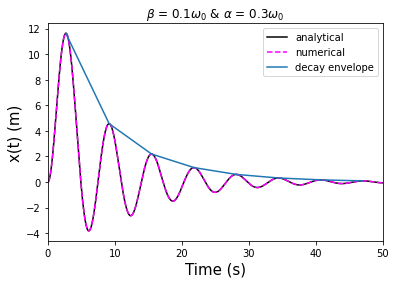

In [5]:
#This is the plot statement for the first set of beta and alpha values. 
plt.title(r'$\beta$ = 0.1$\omega_0$ & $\alpha$ = 0.3$\omega_0$')
plt.plot(x,analytical_solution(x, alpha_1,beta_1), color = 'black',label = 'analytical')
plt.plot(t_array,x_2, color = 'fuchsia',linestyle = '--', label = 'numerical')
plt.plot(peak1,peak2, label = 'decay envelope')
plt.xlim(0,50)
plt.xlabel('Time (s)',fontsize = '15')
plt.ylabel('x(t) (m)', fontsize = '15')
plt.legend()
plt.show()

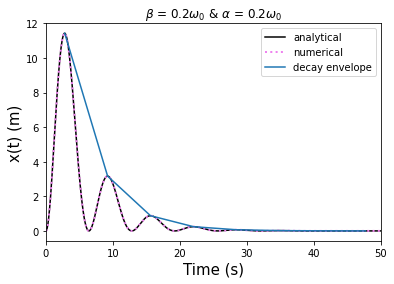

In [6]:
#This is the plot statement for the second set of beta and alpha values.
plt.title(r'$\beta$ = 0.2$\omega_0$ & $\alpha$ = 0.2$\omega_0$')
plt.plot(x,analytical_solution(x, alpha_2,beta_2), color = 'black',label = 'analytical')
plt.plot(t_array, x_3, color = 'violet',linestyle = ':', linewidth = '2',label = 'numerical')
plt.plot(peak3, peak4, label = 'decay envelope')
plt.xlabel('Time (s)',fontsize = '15')
plt.ylabel('x(t) (m)',fontsize = '15')
plt.xlim(0,50)
plt.legend()
plt.show()

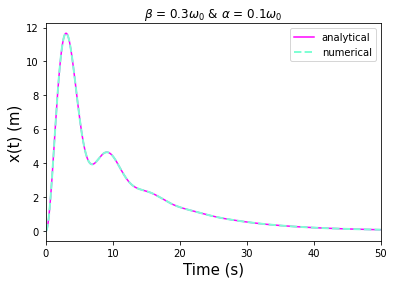

In [7]:
#This is the third plot statement for the third set of beta and alpha values.
plt.title(r'$\beta$ = 0.3$\omega_0$ & $\alpha$ = 0.1$\omega_0$')
plt.plot(x,analytical_solution(x, alpha_3,beta_3), color = 'fuchsia',label = 'analytical')
plt.plot(t_array, x_4, color = 'aquamarine', linestyle = '--', linewidth = '2',label = 'numerical')
plt.xlim(0,50)
plt.xlabel('Time (s)',fontsize = '15')
plt.ylabel('x(t) (m)',fontsize = '15')
plt.legend()
plt.show()

**Qualitatively, how does the solution change as $\beta$ increases and $\alpha$ decreases?**

We see that as $\beta$ increases and $\alpha$ decreases the amount of response from the oscillator goes down. With the lowest $\beta$ we see the optimal response from the oscilator. In the first plot, there is also the maximum displacemnt from equillibrum as the oscillator crosses into the negative position values. As $\alpha$ increases the low-frequency oscillations begin to get damped out quicker. The trend points to an over damped system, which would show no oscillations and minimal response from the oscillator.

**Question #5**

In [8]:
##Running this cell will numercially compute the total energy E(t) in the system as a function of time.
##Then in the cell below we will want to plot this energy as a function of time. We hope to see this value quickly converge on the 
## the value that we calculated on the problem set. 

x_values = np.zeros(steps) #initializing x_values, the same scale as above so we can compare
for i in range(len(t_array)): 
    t_prime = np.linspace(0, t_array[i], steps)
    integral = trap(convolution(t_prime, alpha_1, 0.000000000001, t_array[i]), t_prime) #this numerical code is only valid for beta = 0, this is why we us a very small beta
    x_values[i] = integral 

#We use this for loop to calculate apporx 0 beta integral. We need to use these integral values to get the correct numerical energy. 

v = np.zeros(len(x_values))
dt = x_final/steps         
for i in range(1,len(x_values)):
    v[i] = (x_values[i] - x_values[i-1])/dt
energy = 0.5 * v ** 2 + 0.5 * x_values ** 2

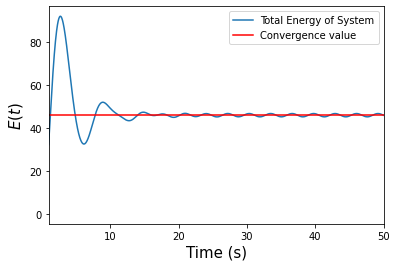

In [9]:
plt.plot(t_array, energy,label = "Total Energy of System")
plt.axhline(y = f_0**2/(2*(alpha_1**2 + omega_0**2)), color = 'red',label = "Convergence value")
plt.xlim(1,50)
plt.xlabel("Time (s)",fontsize='15')
plt.ylabel(r"$E(t)$",fontsize='15')
plt.legend()
plt.show()

**Compare the time sacle of convergence to other physical time scales of the system:**

The total energy of the system quickly converges onto the value that we see in red. This convergence time matches with the time scale of damping in our oscillator. Above we have indicated that this is in the limit of **Zero damping**, we expect that our oscillator will then settle quickly onto a value, and stay there, as very very little energy is being taken out of our system. 

**<h5> IV. LINEAR OSCILLATORS VIA NUMERICAL DIFFERENTIAL EQUATIONS <h5>**


**Question #1**

Rewrite the the equation of motion as two coupled first-order differential equations. How many initial conditions do we need for each of the resulting equations? What are they?

-----We need two initial conditions, $V_0$ and $X_0$.

**Question #2 & Question #3**

In [32]:
#initializing variables for later use in this section
omega_d = 5
omega_0 = 5
beta1  = 1
mass = 1

#two coupled first-order differential equations
def fx(v):
    return v

def fv(omega_0, omega_d, f_0, beta,x, v, t): ##right hand side of the first-order ODE 
    return -2*beta*v - omega_0 ** 2 * x + f_0 * np.sin(omega_d*t)


def solver(x0, v0, t, h): ##this is my ODE solver, this function takes four inputs. X0 and v0 are the initial conditions, t is the final time value
                            ## and the h input is my number of steps.
    N = int(t/h) 
    vx = np.zeros(N) 
    xt = np.zeros(N)   
    t0  = np.linspace(0, t, N)

    #intial conditions
    vx[0] = v0
    xt[0] = x0  
   
    ## this loop is where we execute fourth-order Runge Kutta.
    for i in range(1, N): ## N is the number of steps taken, that is found using a given time and timestep h.

        k1vx = h *fv(omega_0, omega_d, f_0, beta1, xt[i - 1],vx[i - 1], t0[i - 1]) #first Ks ##we see that this line calculates our initial solution for v. It is feed the initial conditions
        k1x = h * fx(vx[i-1]) ##this step then calculates our x solution using the initial condition for v. 

        k2vx = h * fv(omega_0, omega_d, f_0, beta1, xt[i - 1] + k1x/2, vx[i - 1] + k1vx/2, t0[i - 1] + h/2) #second ks ##we then use our previous k_values to calculate the next step. 
        k2x = h * fx(vx[i-1] + k1vx/2) ##again this step takes in the previous v value and the k that was just calculated to advance the solution.


        k3vx = h * fv(omega_0, omega_d, f_0, beta1, xt[i - 1] + k2x/2, vx[i - 1]+ k2vx/2, t0[i - 1] + h/2) #third Ks ##we are now going to use the previous position value and the k's calculated above to advance the solution.
        k3x = h * fx(vx[i - 1] + k2vx/2) ##as before, we need a velocity to tell us the position and then we will also advance our solution by the last k value.


        k4vx = h * fv(omega_0, omega_d, f_0, beta1, xt[i - 1] + k3x,  vx[i - 1]+ k3vx, t0[i - 1] + h) #fourth Ks  ##the proccess here is the same for both steps as it was for the previous 3.
        k4x = h * fx(vx[i - 1] + k3vx) ##the only difference is that we are not dividing our k step in half, and we are advancing our solution by the full k.

        vx[i] = vx[i - 1] + (k1vx + 2 * k2vx + 2 * k3vx + k4vx)/ 6 ## we update our solution of V and x and then we run the next iteration of our loop.
        xt[i] = xt[i - 1] + (k1x + 2 * k2x + 2 * k3x + k4x)/6 ##these solutions are stored to calculate the future values. As the future values of dependent on the previous behavior of the oscillator.

    return t0, xt , vx  #our function outputs the time array that we used for our solution and the x, and v arrays. 
                        #this is to make the plotting process easier.


**Question #4:**

Incorporate your functions from questions (2) and (3) into a program that calculates x(t). Choose parameters so that the system is in the weak damping regime. Plot the solutions for several choices of step size $\Delta t$ and over-plot the analytic solution.

In [37]:
##now plot solution for x(t) for several choices of \delta_t. 

## using my solver to solve the system in the weak damping regime. I also solve the system in the weak damping regime for multiple dt values. 
t, x, v = solver(0,0,15,0.0001) 
t1, x1, v1 = solver(0,0,15,0.02)
t2, x2, v2,= solver(0,0,15,0.2)

def analytical_solution(time):  ##the question asks that we over-plot the analytic solution. This function will output an array of values for the analytical solution. 
    return (f_0/((omega_0**2 - omega_d**2)**2 + 4*beta1**2*omega_d**2)**(1/2)) * np.sin(omega_d*time)

## note, as long the dt << oscilation period then we see from the plots that we can get good approximation. 


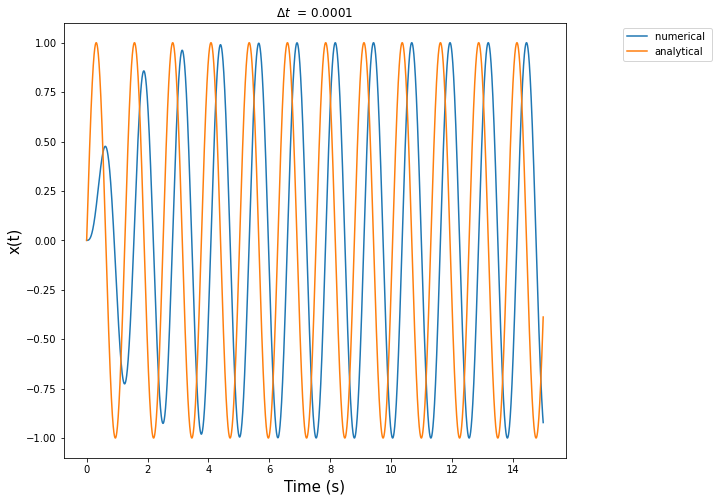

In [42]:
plt.figure(figsize = (9,8))
plt.title(r'$\Delta t$  = 0.0001')
plt.plot(t , x, label = 'numerical ')
plt.plot(t, analytical_solution(t), label = 'analytical')
plt.xlabel('Time (s)',fontsize='15')
plt.ylabel('x(t)',fontsize='15')
plt.legend(loc  = 'upper right', bbox_to_anchor =(1.3, 1))
plt.show()

It is important to note that the first and second graph do not look extremly different. This is due to the fact that as long as the $\Delta t$ $<<$ oscillation period the we can get a "good" approximation for our system.

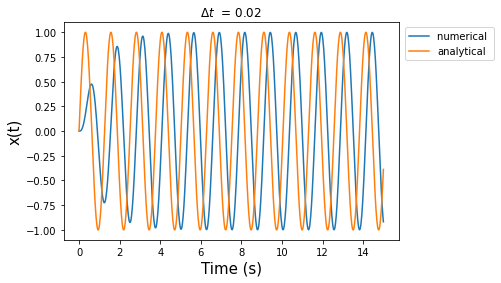

In [13]:
plt.title(r'$\Delta t$  = 0.02')
plt.plot(t1, x1,label = 'numerical ')
plt.plot(t1, analytical_solution(t1), label = 'analytical')
plt.xlabel('Time (s)',fontsize='15')
plt.ylabel('x(t)',fontsize='15')
plt.legend(loc  = 'upper right', bbox_to_anchor =(1.3, 1))
plt.show()

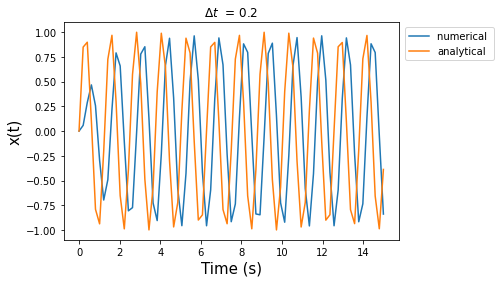

In [14]:
plt.title(r'$\Delta t$  = 0.2')
plt.plot(t2, x2,label = 'numerical ')
plt.plot(t2, analytical_solution(t2),label = 'analytical')
plt.xlabel('Time (s)',fontsize='15')
plt.ylabel('x(t)',fontsize='15')
plt.legend(loc  = 'upper right', bbox_to_anchor =(1.3, 1))
plt.show()

**NOTE**: In the final figure we see that the resolution of the graph is much worse than the previous two. This is because the $\Delta t$ is significantly smaller. We also begin to see slight deviations from the analytical solution.

**Question #5**

How small should $\Delta t$ be so that your numerical result approximates the analytic answer well? Your answer should compare $\Delta t$ to a physical time scale in the problem:

As I stated above, the $\Delta t$ must be much less then the $\beta$ value initialized above. The graphs qualitativley prove this, in the first two graphs the solutions are accurate, and then we see clear deviation in the third plot.

**Question #6**

We obtain the frequency-dependent amplitude $A(\omega_o)$ by running your Runge_Kutta methods for many choices of the driving frequency while holding other parameters constant.Plot $A(\omega_o)$ as a function of $\omega_o$. 

Does the shape of this curve look familiar?

In [15]:
##the first two values are initilizing 100 omega values between 0 and 20. We will later loop through these values to great our plot.
res = 100
omega_values = np.linspace(0,20,res)
amplitude = np.zeros(res) #initializing the array that amplitude values will be stored in, and that will later be plotted.
##this loop is allowing us to plot amplitude values as a function of omega_0. This procedure links an amplitude value to an omeega value, indicating the response form the oscillator.
for i in range(0, res):
    omega_d = omega_values[i]
    t, x, v =  solver(0,0,21,0.001)
    ## the 'middle' variable and "max_amplitude" variable are curcial to creating this graph.
    ## each time we sample an omega_0 value we get a new graph. When these values are 'nice', meaning they are smooth and act how we want them to act, 
    ## we believe that the python max function is actually sampling the maximum value from the solution array. 
    ## However, I noticed that there is abnormal behavior at low values of omega, where the graph will shoot up, and then level to some maximum amplitude.
    ## So, if we take the maximum value of this array, we will be sampling the 'abnormal' behavior of the oscialltor; and the amplitude peak will look distorted. We want the 'leveled out' max value. 
    ## To mitigate this effect, I only sampled values from the middle of each solution array. This ensured that the sampled peak value was representative of our oscillators behavior. 
    middle = int((21/0.001)/2) 
    max_amplitude = max(x[middle:])**2
    amplitude[i] = max_amplitude #storing the solution into the amplitude array. 

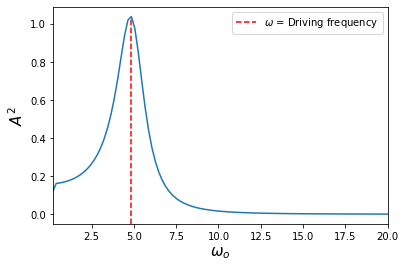

In [16]:
## In this cell we plot the resonance peak of our oscillator. This should be peaked around the driving frequency, but we are seeing odd behavior at low natural frequencies.
plt.axvline(x = 4.8, linestyle = '--', ymax = 0.95,c = 'red' , label = r'$\omega$ = Driving frequency')
plt.plot(omega_values, amplitude)
plt.xlabel(r'$\omega_o$',fontsize='15')
plt.ylabel(r'$A^2$',fontsize='15')
plt.legend()
plt.xlim(0.2, 20)
plt.show()

**Desciption of the figure:** This plot shows the amplitude, $A^2$ of a driven oscillator as a function of the natural frequency of the system, $\omega_o$. The driving freqeuncy of the system is held fixed. As indicatd in the figure by the dotted red line, the response from the oscillator is largest when $\omega$ and $\omega_o$ are close to each other. **This graph does look familiar! We were expecting the oscillator's peak response to be at the resonance!**

**Question #7**

Obtain the quaility factor $Q$ by measuring properties of your numerically-generated resonane peak. For this part, you may need to fin an alternative definition of $Q$.

Definition of quality factor: 
$Q = \frac{\omega_o}{\epsilon}$, where $\epsilon = $ Full Width Half Maximum (FWHM).

In [17]:
##When running this cell we will calculate the Quality factor. 

##To Calculate the quality factor we need to use an alternative definition of Q. 

half = max(amplitude)/2 ##this variable is an integer representing half of the maximum amplitude for our resonance peak.
for i in range(len(amplitude)):  #now we must loop through the values of amplitude to find the closest number to our "half" value that we just calculated.

    if amplitude[i] > half: #this conditional statement checks for the nearset number to the fwhm. We need this statement because no value will exaclty match the integer we calculated.
        x = amplitude[i] ##Storing the amplitude values in this variable

half_index = np.where(amplitude == x) ##Now we need to use the np.where method find the index of the 'amplitude' array that holds our nearst approximation of FWHM.
fwhm = half_index [0] [0] ##this index pattern is needed to get the information from the np.where object 'half_index'.

Q = omega_0 /fwhm ##now use our alternative definition to calculate the quality factor.
print(Q)

0.17857142857142858


 **Quality factors connection to resonance peak:**
 
 We know that the quality factor is a dimensionless parameter that describes how underdamped an oscillator is. For this system $Q = 0.17857142857142858 $, this is a low quality factor because our oscillators energy is damped out extremely quickly. As the resonance peak for different oscillators becomes sharper, there will be a greater and greater quality factor. This shows that energy stored in a particular oscillator cannot be damped out easily.

**Question #8**

As seen in the homework, Fractional energy lost = $\frac{2\pi}{Q}$. Now we can calculate this value in the following cell:

In [18]:
frac_energy_lost = 2*np.pi/Q 
print(frac_energy_lost) ##as predicted this value is extremely large, and is representative of a small quality factor.

35.18583772020568



This fractional energy lost due to damping, is related to our quality factor , $Q = 2\pi\frac{E}{\Delta{}E_{\rm{diss}}}$. This result is valid in the weak damping regime $\beta << \omega_0$. The fractional energy lost per cycle cannot be seen in the numerical resluts of the position of the oscillator because we use $\beta << \omega_d$. In the $A^2$ plots we see that there is a sharp decrease in the maximum amplitude values the further away from resosnace we drive the oscillator. It is clear that even in the limit of weak damping, energy is dissapted form the system quite fast.

**<h5> V. NON-LINEAR PENDULUM <h5>**

**Question #1**

This question will be answered thouroghly in a pdf document that will be attatched to this project.

**Question #2 & Question #4** 

**NOTE**: Question #3 will be discussed indepth in the pdf. Question #3 and Question #4 show further insight into how we obtained the equations expressed in this cell. In the pdf I show the inital first-order ODE's and then I also discuss who I get to the dimensionless equations that show up in this cell.

In [19]:
g = 9.8 #m/s^2
I = 0.5
M = 1 #kg
l = 1 #m
theta0 = np.pi/6
#dimensional equations of motion seperated in to two first order linear differential equations

def ftheta(omega): #two first_order ODEs
    return omega
def fomega(theta): 
    return - np.sin(theta) #we are not invoking the small angle approximation here


##this is the same procedure of 4th order rungekutta that I discussed in detail.

##The only differnce was how we solved our coupled equations.
def solver2(theta0, omega0, t, h):

    N = int(t/h) 
    theta = np.zeros(N) 
    omega = np.zeros(N)   
    t0  = np.linspace(0, t, N)
    #intial conditions
    theta[0] = theta0
    omega[0] = omega0  
   

    for i in range(1, N): 

        k1theta = h *ftheta(omega[i - 1])
        k1omega = h * fomega(theta[i - 1])


        k2theta = h * ftheta(omega[i - 1] + k1omega/2)
        k2omega = h * fomega(theta[i - 1] + k1theta/2) 


        k3theta = h * ftheta(omega[i - 1] + k2omega/2)
        k3omega = h * fomega(theta[i -1] + k2theta/2)


        k4theta = h * ftheta(omega[i - 1] + k3omega)
        k4omega = h * fomega(theta[i - 1] + k3theta)

        theta[i] = theta[i - 1] + (k1theta + 2 * k2theta + 2 * k3theta + k4theta)/ 6
        omega[i] = omega[i - 1] + (k1omega + 2 * k2omega + 2 * k3omega + k4omega)/6

    return t0, omega , theta 


**Discuss how you chose your time step size $\Delta \bar{t}$:**

We know that this time step must be much smaller than the oscillation period. We see below that the resolution used is significantly smaller than the oscillation period. This is an appropriate scale for this physical scenario. In the following cells I will demonstrate that lower and lower time steps significantly decreases the numerical error, and accurately describes energy conservation in the system. 

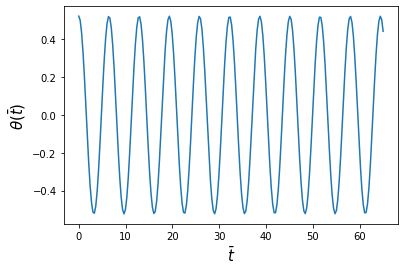

In [20]:
##this cell is a plot statement for our solution of the pendulum with the given initial conditions.
t0, omega, theta = solver2(theta0, 0, 65, 0.3)

plt.plot(t0, theta)
plt.ylabel(r'$\theta(\bar{t}$)',fontsize='15')
plt.xlabel(r'$\bar{t}$',fontsize='15')
plt.show()

**Period should be $\approx$ $2\pi$, we can see this on the plot above...**

**Question #7**


In [21]:
def E_bar (thetas, omegas): ##this is a function that calculates e_bar
    return 1/2*(omegas**2) + (1 - np.cos(thetas))
def frac_diff_energy (thetas, omegas): ##this is a function that calcualtes the fractional energy difference using the ebar function and the thetas from my numerical solution that I calculated in the cell above.
    num = E_bar(thetas, omegas) - E_bar(thetas[0], omegas[0])
    den  = E_bar(thetas[0], omegas[0])
    return abs(num/den) #this is returning the fractional difference array

**Question #8**

I am now going ot restrict the computaional domain using the appropriate stepsize:


In [22]:
t0, omega, theta = solver2(theta0, 0, 65, 0.02)

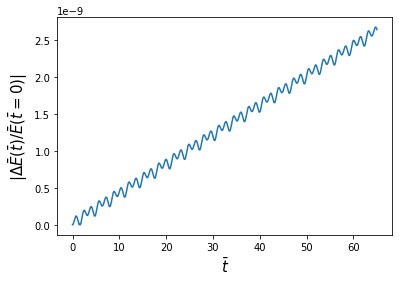

In [23]:
plt.plot(t0, frac_diff_energy(theta, omega))
plt.xlabel(r'$\bar{t}$',fontsize='15')
plt.ylabel(r'$|\Delta\bar{E}(\bar{t})/\bar{E}(\bar{t}=0)|$',fontsize='15')
plt.show()
##this plot statement shows the inital fractional energy difference with respect to dimensionless time. 
## I have restricted all the computational domain to 10 ^-8 
##we can see that this was done by reducing the timestep by an order of magnitude.


**Fractional Energy Difference:** The plot above is the fractional energy difference in our system. The energy is unitless energy and is a function of unitless time. We can see that the maximum values are on the order of $10^{-9}$, which we can associate with the numerical error in our system.

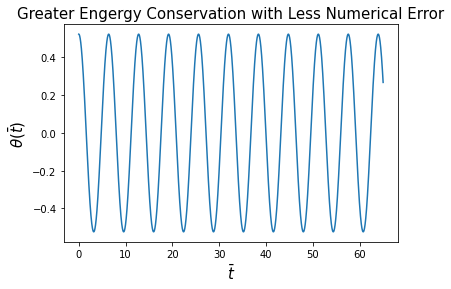

In [24]:
##updated solution showing greater energy conservation
plt.title('Greater Engergy Conservation with Less Numerical Error',fontsize='15')
plt.plot(t0, theta)
plt.ylabel(r'$\theta(\bar{t}$)',fontsize='15')
plt.xlabel(r'$\bar{t}$',fontsize='15')
plt.show()

**NEW SOLUTION:** This is a plot of our solution solved using Runge_kutta methods. We have plotted this solution using the time step, $\Delta\bar{t}$, that restricted my computational domain to the numerical error shown earlier. 

In [25]:
def ftheta1(omega): #two first_order ODEs
    return omega
def fomega1(theta): 
    return - theta #we are invoking the small angle approximation


##this is the same procedure of 4th order rungekutta that I discussed in detail.

##The only differnce was how we solved our coupled equations.
def solver3(theta0, omega0, t, h):

    N = int(t/h) 
    theta = np.zeros(N) 
    omega = np.zeros(N)   
    t0  = np.linspace(0, t, N)
    #intial conditions
    theta[0] = theta0
    omega[0] = omega0  
   

    for i in range(1, N): 

        k1theta = h *ftheta1(omega[i - 1])
        k1omega = h * fomega1(theta[i - 1])


        k2theta = h * ftheta1(omega[i - 1] + k1omega/2)
        k2omega = h * fomega1(theta[i - 1] + k1theta/2) 


        k3theta = h * ftheta1(omega[i - 1] + k2omega/2)
        k3omega = h * fomega1(theta[i -1] + k2theta/2)


        k4theta = h * ftheta1(omega[i - 1] + k3omega)
        k4omega = h * fomega1(theta[i - 1] + k3theta)

        theta[i] = theta[i - 1] + (k1theta + 2 * k2theta + 2 * k3theta + k4theta)/ 6
        omega[i] = omega[i - 1] + (k1omega + 2 * k2omega + 2 * k3omega + k4omega)/6

    return t0, omega , theta 

In [26]:
#im going to initialize 3 small angles
theta1  = 0.0872665 # 5 degrees in radians 
theta2  = 0.139626 #8 degrees in radians
theta3 = 0.174533 #10 degrees in radians

t011, omega11, theta11 = solver2(theta1, 0,65,0.1)

t022, omega22, theta22 = solver2(theta2, 0, 65, 0.1)

t33, omega33, theta33 = solver2(theta3, 0, 65, 0.1)

t1 = np.linspace(0, 65,len(t011))
t2 = np.linspace(0, 65, len(t022))
t3 = np.linspace(0, 65, len(t33))

##this is solution after applying the small angle approximation show in the attatched PDF
def small (t,t_intial): 
    return t_intial*np.cos(t)


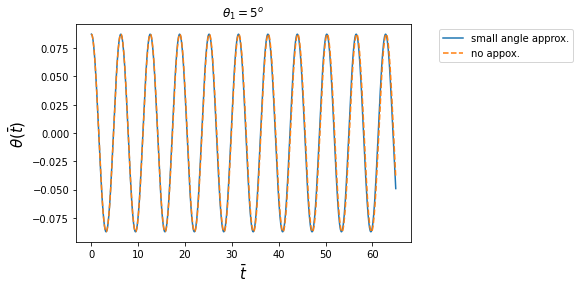

In [27]:
#first approximation with a small is angle
## while also plotting the analytical solution.
plt.title(r'$\theta_1 = 5^o$')
plt.plot(t1,  small(t1,theta1),label = 'small angle approx.')
plt.plot(t011, theta11, linestyle= '--',label= 'no appox.')
plt.ylabel(r'$\theta(\bar{t}$)',fontsize='15')
plt.xlabel(r'$\bar{t}$',fontsize='15')
plt.legend(loc  = 'upper right', bbox_to_anchor =(1.5, 1))
plt.show()

**Caption:**

Analytic solution to simple pendulum with small angle approximation (blue) and numerical solution without small angle approximation (dashed orange). Both curves invoked $\theta(\bar{t}=0)=5^o$ and $\bar{\omega}(\bar{t}=0)=0$.

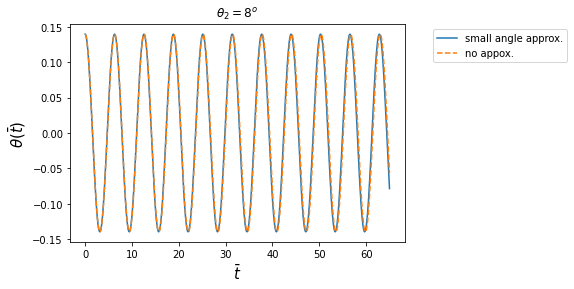

In [28]:
#second approximation with a small is angle
plt.title(r'$\theta_2 = 8^o $')
plt.plot(t2,  small(t2,theta2),label = 'small angle approx.')
plt.plot(t022, theta22, linestyle= '--',label= 'no appox.')
plt.ylabel(r'$\theta(\bar{t}$)',fontsize='15')
plt.xlabel(r'$\bar{t}$',fontsize='15')
plt.legend(loc  = 'upper right', bbox_to_anchor =(1.5, 1))
plt.show()

**Caption:**

Analytic solution to simple pendulum with small angle approximation (blue) and numerical solution without small angle approximation (dashed orange). Both curves invoked $\theta(\bar{t}=0)=8^o$ and $\bar{\omega}(\bar{t}=0)=0$.

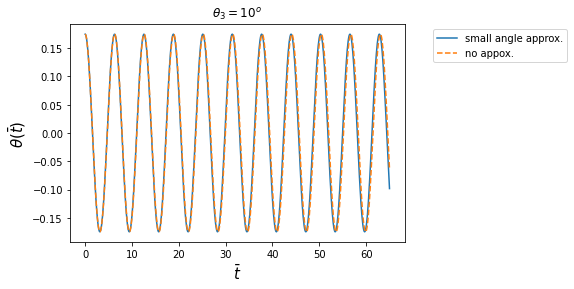

In [29]:
#third approximation with a small is angle
plt.title(r'$\theta_3 = 10^o$')
plt.plot(t3,  small(t3,theta3),label = 'small angle approx.')
plt.plot(t33, theta33, linestyle= '--',label= 'no appox.')
plt.ylabel(r'$\theta(\bar{t}$)',fontsize='15')
plt.xlabel(r'$\bar{t}$',fontsize='15')
plt.legend(loc  = 'upper right', bbox_to_anchor =(1.5, 1))
plt.show()

**Caption:**

Analytic solution to simple pendulum with small angle approximation (blue) and numerical solution without small angle approximation (dashed orange). Both curves invoked $\theta(\bar{t}=0)=10^o$ and $\bar{\omega}(\bar{t}=0)=0$.

**It is clear that if the angle is small the appoximation that we derived in question #9 is extremly accurate. Even when we increase the value of $\theta_0$ we see that the numerical solution and the analytical approximation are exactly the same with only slight deviations from the true solution** 

**NOTE:** I have tested 'large' angles and we do see deviations from the unapproximated solution.
